# Upload The Dataset

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.width', 1000)

df = pd.read_csv(r"C:\Users\ernbg\PycharmProjects\gezinomi_project\miuul_gezinomi.csv", sep=";")

In [ ]:
df["Price"].dtype
df["SaleCityName"].nunique()
df["ConceptName"].nunique()
df["ConceptName"].value_counts()z
df["Price"] = df["Price"].str.replace(",", ".").astype(float)

In [8]:
df.groupby("SaleCityName")["Price"].sum()

df.groupby("ConceptName")["Price"].sum()

df.groupby("SaleCityName")["Price"].mean()

df.groupby("ConceptName")["Price"].mean()

df.groupby(["ConceptName","SaleCityName"])["Price"].mean()


ConceptName     SaleCityName
Herşey Dahil    Antalya         64.519028
                Aydın           53.995467
                Diğer           84.771093
                Girne           97.680970
                Muğla           63.020053
                İzmir           74.701519
Oda + Kahvaltı  Antalya         63.504816
                Aydın           34.458787
                Diğer           37.599082
                Girne           39.775536
                Muğla           59.037763
                İzmir           41.320342
Yarım Pansiyon  Antalya         67.190613
                Aydın           30.016543
                Diğer           42.113440
                Girne           53.247838
                Muğla           45.120924
                İzmir           59.610053
Name: Price, dtype: float64

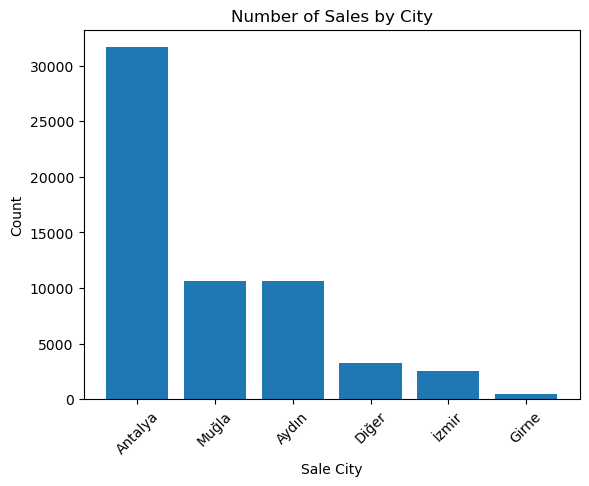

In [10]:
# "Which city has the highest number of holiday sales?"
city_counts = df["SaleCityName"].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xlabel("Sale City")
plt.ylabel("Count")
plt.title("Number of Sales by City")
plt.xticks(rotation=45)
plt.show()

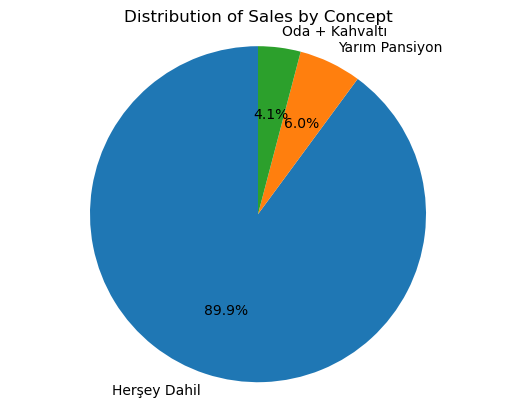

In [12]:
# "Which concept is preferred the most?"
concept_counts = df["ConceptName"].value_counts()
plt.pie(concept_counts.values, labels=concept_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Sales by Concept")
plt.axis("equal")
plt.show()

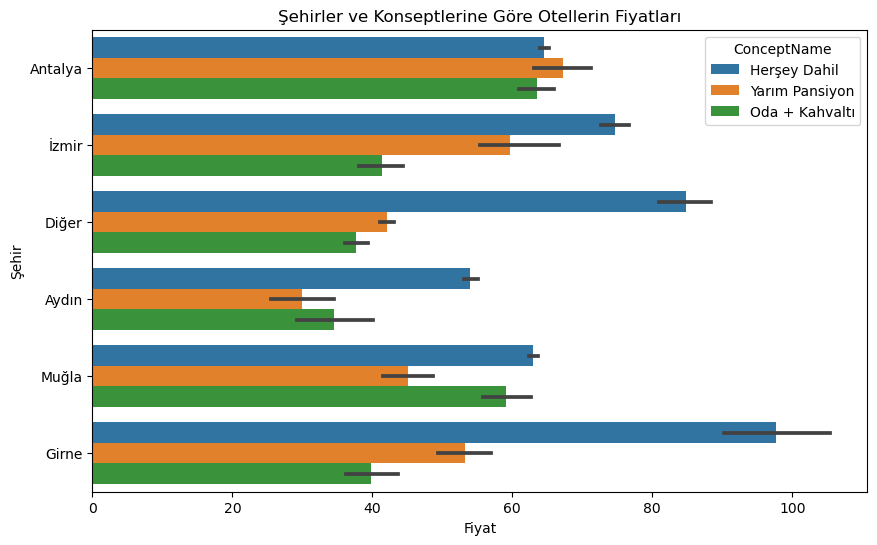

In [13]:
# "How do prices vary among concepts in different seasons?"
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='SaleCityName', hue='ConceptName', data=df)
plt.xlabel('Fiyat')
plt.ylabel('Şehir')
plt.title('Şehirler ve Konseptlerine Göre Otellerin Fiyatları')
plt.show()


<Figure size 1000x600 with 0 Axes>

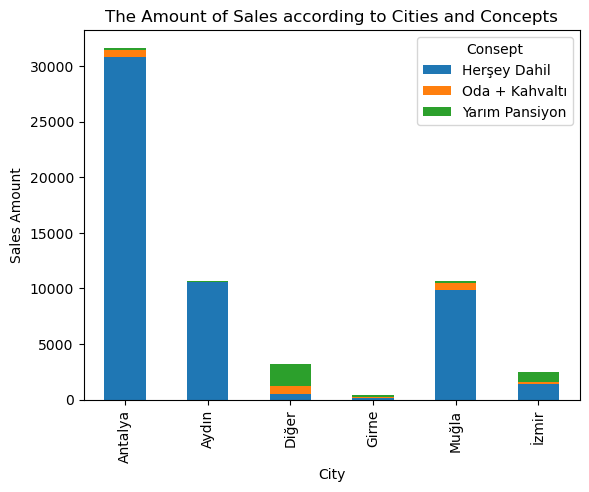

In [25]:
# "How does the number of sales vary among cities and concepts?"
plt.figure(figsize=(10, 6))
df.groupby(['SaleCityName', 'ConceptName']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.title('The Amount of Sales according to Cities and Concepts')
plt.legend(title='Consept')
plt.show()


# Task 2
SaleCheckInDayDiff variable shows how long before the CheckIn date the customer completed their purchase.

Construct the intervals convincingly.

For example: You can use the ranges '0_7', '7_30', '30_90', '90_max'.

You can use the names "Last Minuters", "Potential Planners", "Planners", "Early Bookers" for these intervals.

In [16]:
bins = [0, 7, 30, 90, df["SaleCheckInDayDiff"].max()]
labels = ["Last Minuters", "Potential Planners", "Planners", "Early Bookers"]
df["BookingCategory"] = pd.cut(df["SaleCheckInDayDiff"], bins=bins, labels=labels, right=False)
df["BookingCategory"] = df["BookingCategory"].astype("category")
df.head()


,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,BookingCategory
0,415122,2022-12-03 00:00:00,2022-12-03 00:00:00,79.304029,Herşey Dahil,Antalya,Saturday,0,Low,Last Minuters
1,415103,2022-12-03 00:00:00,2022-12-03 00:00:00,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low,Last Minuters
2,404034,2022-09-12 00:00:00,2022-09-13 00:00:00,77.838828,Herşey Dahil,Antalya,Tuesday,1,High,Last Minuters
3,415094,2022-12-03 00:00:00,2022-12-10 00:00:00,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low,Potential Planners
4,414951,2022-12-01 00:00:00,2022-12-03 00:00:00,140.476191,Yarım Pansiyon,İzmir,Saturday,2,Low,Last Minuters


# Task 3
What are the average earnings in breakdown of COUNTRY, SOURCE, SEX, AGE?


In [18]:
part1 = df.groupby(['SaleCityName', 'ConceptName', 'BookingCategory']).agg({'Price': 'mean', 'SaleId': 'count'})
part2 = df.groupby(['SaleCityName', 'ConceptName', 'Seasons']).agg({'Price': 'mean', 'SaleId': 'count'})
part3 = df.groupby(['SaleCityName', 'ConceptName', 'CInDay']).agg({'Price': 'mean', 'SaleId': 'count'})

# Task 4
Rank the output of the City-Concept-Season breakdown by PRICE



In [19]:
agg_df = df.groupby(['SaleCityName', 'ConceptName', 'Seasons']).agg({'Price': 'mean', 'SaleId': 'count'}).reset_index()
agg_df = agg_df.sort_values('Price', ascending=False)
print(agg_df)

   SaleCityName     ConceptName Seasons       Price  SaleId
18        Girne    Herşey Dahil    High  103.935448      55
19        Girne    Herşey Dahil     Low   90.935944      51
34        İzmir  Yarım Pansiyon    High   87.657303     120
13        Diğer    Herşey Dahil     Low   87.310882     141
12        Diğer    Herşey Dahil    High   83.787273     365
30        İzmir    Herşey Dahil    High   74.748363    1235
31        İzmir    Herşey Dahil     Low   74.308287     147
4       Antalya  Yarım Pansiyon    High   73.259029     118
2       Antalya  Oda + Kahvaltı    High   66.267969     303
0       Antalya    Herşey Dahil    High   64.920065   27126
24        Muğla    Herşey Dahil    High   63.384036    9583
5       Antalya  Yarım Pansiyon     Low   62.001678     138
1       Antalya    Herşey Dahil     Low   61.552427    3669
26        Muğla  Oda + Kahvaltı    High   61.264691     593
3       Antalya  Oda + Kahvaltı     Low   60.666730     295
22        Girne  Yarım Pansiyon    High 

# Task 5 
• All variables except PRICE in the output of the third question are index names. Convert these names to variable names.


In [21]:
agg_df.reset_index(inplace=True)
agg_df.head()


,index,SaleCityName,ConceptName,Seasons,Price,SaleId
0,18,Girne,Herşey Dahil,High,103.935448,55
1,19,Girne,Herşey Dahil,Low,90.935944,51
2,34,İzmir,Yarım Pansiyon,High,87.657303,120
3,13,Diğer,Herşey Dahil,Low,87.310882,141
4,12,Diğer,Herşey Dahil,High,83.787273,365


# Task 6
Identify new level-based customers (personas).

• Define the new level-based sales and add it as a variable to the dataset.

• Name of the new variable to be added: sales_level_based

• It was necessary to create the sales_level_based variable by combining the observations in the output from the previous question.

In [23]:
agg_df['sales_level_based'] = agg_df[["SaleCityName", "ConceptName", "Seasons"]].agg(lambda x: '_'.join(x).upper(), axis=1)
agg_df.head()

,index,SaleCityName,ConceptName,Seasons,Price,SaleId,sales_level_based
0,18,Girne,Herşey Dahil,High,103.935448,55,GIRNE_HERŞEY DAHIL_HIGH
1,19,Girne,Herşey Dahil,Low,90.935944,51,GIRNE_HERŞEY DAHIL_LOW
2,34,İzmir,Yarım Pansiyon,High,87.657303,120,İZMIR_YARIM PANSIYON_HIGH
3,13,Diğer,Herşey Dahil,Low,87.310882,141,DIĞER_HERŞEY DAHIL_LOW
4,12,Diğer,Herşey Dahil,High,83.787273,365,DIĞER_HERŞEY DAHIL_HIGH


# Task 7

Segment new customers (personas).

• Divide new personas into 4 segments according to PRICE.

• Add the segments to agg_df as a variable with the SEGMENT naming.

• Describe segments (group by segments and get price mean, max, sum).

In [24]:
agg_df["SEGMENT"] = pd.qcut(agg_df["Price"], 4, labels=["D", "C", "B", "A"])
agg_df.head(30)
agg_df.groupby("SEGMENT").agg({"Price": ["mean", "max", "sum"]})


Price                        
              mean         max         sum
SEGMENT                                   
D        33.366288   39.479630  300.296592
C        44.887654   54.141797  403.988887
B        60.274498   64.920065  542.470478
A        82.467833  103.935448  742.210498

# Task 8
Classify new customers and estimate how much revenue they can generate.

• How much income is expected to be earned on average by a person who wants to have an all-inclusive holiday in Antalya during the high season?

• In which segment will a holidaymaker go to a half-board hotel in Girne in low season?

In [27]:
agg_df.sort_values(by="Price")
new_user = "ANTALYA_HERŞEY DAHIL_HIGH"
agg_df[agg_df["sales_level_based"] == new_user]



,index,SaleCityName,ConceptName,Seasons,Price,SaleId,sales_level_based,SEGMENT
9,0,Antalya,Herşey Dahil,High,64.920065,27126,ANTALYA_HERŞEY DAHIL_HIGH,B


In [28]:
agg_df[agg_df["sales_level_based"]=="GIRNE_YARIM PANSIYON_LOW"]


,index,SaleCityName,ConceptName,Seasons,Price,SaleId,sales_level_based,SEGMENT
19,23,Girne,Yarım Pansiyon,Low,48.578903,110,GIRNE_YARIM PANSIYON_LOW,C
